**Regression analysis : B0, B1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# importing data :
path = '/content/1. Simple linear regression - 1. Simple linear regression.csv'
#path_2 = ''
df = pd.read_csv(path)
#df2 = pd.read_csv()

In [ ]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [ ]:
df.tail()

,SAT,GPA
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76
83,2050,3.81


In [ ]:
df.shape

(84, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [ ]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [ ]:
# Now for regression analysis :
def a_b(vals1,vals2):
  a = np.mean(vals1)
  b = np.mean(vals2)
  nu = 0
  for i in range (len(vals1)):
    nu += (vals1[i]-a)*(vals2[i]-b)
  return nu

In [ ]:
def deno(vals1):
  a = np.mean(vals1)
  de = 0
  for i in range(len(vals1)):
    de += (vals1[i]-a)**2
  return de

In [ ]:
numi = a_b(df['SAT'],df['GPA'])
print(numi)

1501.5645238095242


In [ ]:
deni = deno(df['SAT'])
print(deni)

906912.7023809522


In [ ]:
b1 = numi/deni

In [ ]:
b0 = np.mean(df['GPA'])-(b1*np.mean(df['SAT']))

In [ ]:
print(b0,b1)

0.2750402996602781 0.001655688050092815


# Hence the equation for y_hat = 0.275 + 0.00165(x)

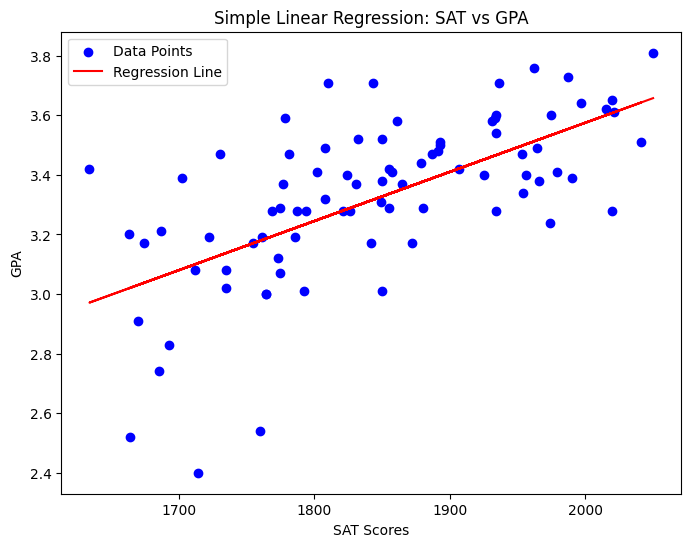

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['SAT'], df['GPA'], color='blue', label='Data Points')
plt.plot(df['SAT'], 0.275+(0.00165*df['SAT']), color='red', label='Regression Line')
plt.xlabel('SAT Scores')
plt.ylabel('GPA')
plt.title('Simple Linear Regression: SAT vs GPA')
plt.legend()
plt.show()

In [ ]:
def error_val(val1,val2):
  n = len(val1)
  e = 0
  for i in range(n):
    y_cap = 0.275+(0.00165*val1[i])
    e += (val2[i]-y_cap)**2
  return e

In [ ]:
error_reg = error_val(df['SAT'],df['GPA'])
print(error_reg)

3.6466273025000002


In [ ]:
error = 3.64
def se1(val1):
  dr = 0
  for i in range(len(val1)):
    dr += (val1[i]-np.mean(val1))**2
  dr = dr**0.5
  return error/dr

In [ ]:
SE1 = se1(df['SAT'])
print(SE1)

0.003822246056648668


In [ ]:
t_val = 0.00165/SE1
print(t_val)

0.4316833546416722


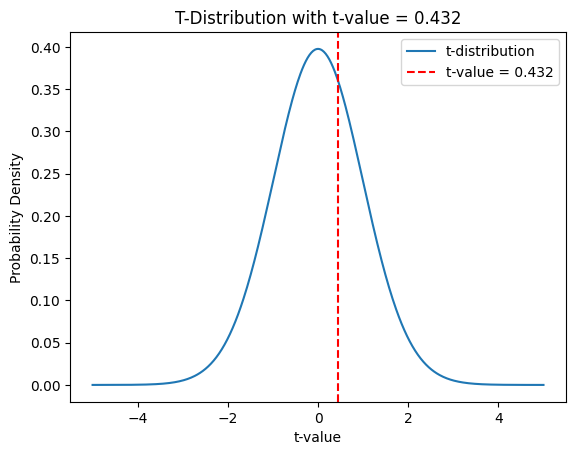

In [ ]:
# prompt: plot t-value curve with t-value = 0.432

import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Define the degrees of freedom (n-2)
df_t = len(df) - 2

# Generate x-values for the t-distribution curve
x = np.linspace(-5, 5, 500)

# Calculate the probability density function (PDF) for the t-distribution
pdf = stats.t.pdf(x, df_t)

# Plot the t-distribution curve
plt.plot(x, pdf, label='t-distribution')

# Add a vertical line at the calculated t-value
plt.axvline(x=t_val, color='red', linestyle='--', label='t-value = 0.432')

# Add labels and title
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.title('T-Distribution with t-value = 0.432')
plt.legend()

# Show the plot
plt.show()


In [ ]:
df.shape

(84, 2)

In [ ]:
dof = df.shape[0] - df.shape[1]
print(dof)

82


In [ ]:
alpha = 0.05

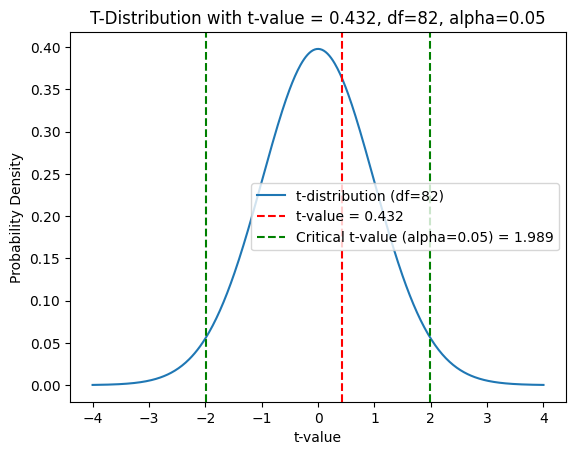

In [ ]:
# prompt: plot t-value curve with t-value = 0.432 with dof = 82 and alpha = 0.05

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given values
t_val = 0.432
dof = 82
alpha = 0.05

# Generate x-values for the t-distribution curve
x = np.linspace(-4, 4, 500)

# Calculate the probability density function (PDF) for the t-distribution
pdf = stats.t.pdf(x, dof)

# Plot the t-distribution curve
plt.plot(x, pdf, label='t-distribution (df=82)')

# Add a vertical line at the calculated t-value
plt.axvline(x=t_val, color='red', linestyle='--', label='t-value = 0.432')

# Add critical t-values for two-tailed test
critical_t = stats.t.ppf(1 - alpha / 2, dof)
plt.axvline(x=critical_t, color='green', linestyle='--', label=f'Critical t-value (alpha=0.05) = {critical_t:.3f}')
plt.axvline(x=-critical_t, color='green', linestyle='--')


# Add labels and title
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.title('T-Distribution with t-value = 0.432, df=82, alpha=0.05')
plt.legend()

# Show the plot
plt.show()


**Task 02 : y = 2x+3+error and predict the closest hypothesis y_hat :**

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate x values
x_values = np.linspace(0, 10, 100)  # 100 values from 0 to 10

# Calculate the deterministic part of y
y_deterministic = 2 * x_values + 3

# Generate random error
random_error = np.random.normal(2, 2, size=x_values.shape)

# Calculate the y values with random error
y_values = y_deterministic + random_error

# Create a DataFrame
data = pd.DataFrame({'x': x_values, 'y': y_values})

# Print the first few rows of the dataset
print(data.head())

         x         y
0  0.00000  5.993428
1  0.10101  4.925492
2  0.20202  6.699417
3  0.30303  8.652120
4  0.40404  5.339774


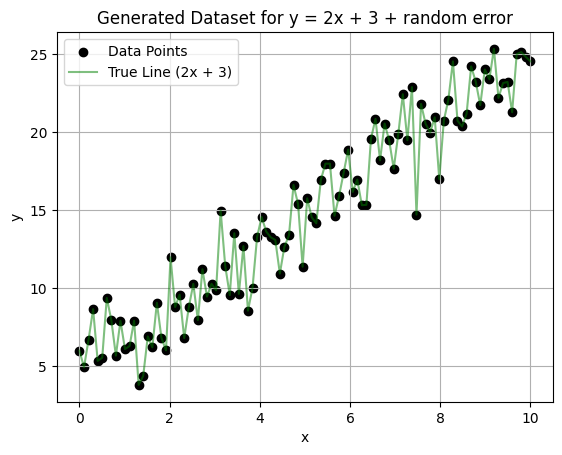

In [ ]:
# Plot the generated dataset
plt.scatter(data['x'], data['y'], label='Data Points', color='black')
plt.plot(data['x'], data['y'], color='green', label='True Line (2x + 3)', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Dataset for y = 2x + 3 + random error')
plt.legend()
plt.grid()
plt.show()

In [ ]:
data

,x,y
0,0.00000,5.993428
1,0.10101,4.925492
2,0.20202,6.699417
3,0.30303,8.652120
4,0.40404,5.339774
...,...,...
95,9.59596,21.264889
96,9.69697,24.986180
97,9.79798,25.118070
98,9.89899,24.808207


In [ ]:
numi_1 = a_b(data['x'],data['y'])
print(numi_1)

deni_1 = deno(data['x'])
print(deni_1)

b1_new = numi_1/deni_1
b0_new = np.mean(data['y'])-(b1_new*np.mean(data['x']))

print(b0_new,b1_new)

1723.7898990067729
850.1683501683499
4.6543742918452455 2.0275865346733135


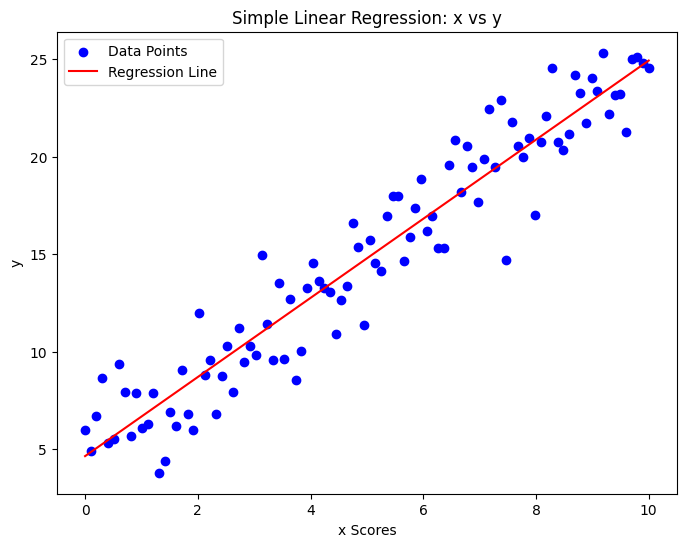

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'], color='blue', label='Data Points')
plt.plot(data['x'], 4.65+(2.027*data['x']), color='red', label='Regression Line')
plt.xlabel('x Scores')
plt.ylabel('y')
plt.title('Simple Linear Regression: x vs y')
plt.legend()
plt.show()

In [ ]:
def error_val_1(val1,val2):
  n = len(val1)
  e = 0
  for i in range(n):
    y_cap = 4.65+(2.027*val1[i])
    e += (val2[i]-y_cap)**2
  return e

error_reg_1 = error_val_1(data['x'],data['y'])
print(error_reg_1)

325.9675170506928


In [ ]:
error1 = 325.9675
def se1n(val1):
  dr = 0
  for i in range(len(val1)):
    dr += (val1[i]-np.mean(val1))**2
  dr = dr**0.5
  return error1/dr

SE1n = se1n(data['x'])
print(SE1n)

11.17948596627429


In [ ]:
t_val_n = 2.027/SE1n
print(t_val_n)

0.18131423985994988


In [ ]:
dof_n = data.shape[0]-data.shape[1]
print(dof_n)

98


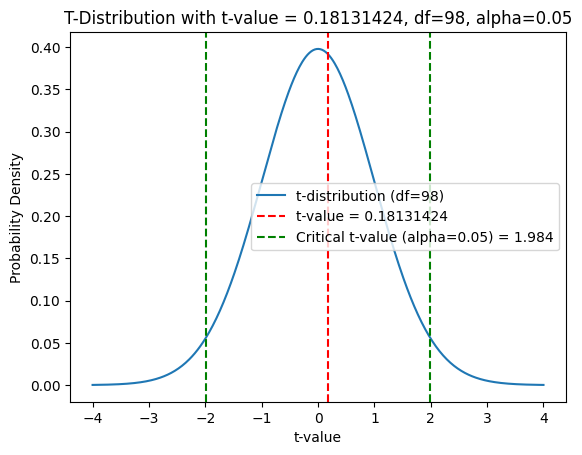

In [ ]:
# prompt: plot t-value curve with t-value = 0.18131424 with dof = 98 and alpha = 0.05

# Given values
t_val = 0.18131424
dof = 98
alpha = 0.05

# Generate x-values for the t-distribution curve
x = np.linspace(-4, 4, 500)

# Calculate the probability density function (PDF) for the t-distribution
pdf = stats.t.pdf(x, dof)

# Plot the t-distribution curve
plt.plot(x, pdf, label='t-distribution (df=98)')

# Add a vertical line at the calculated t-value
plt.axvline(x=t_val, color='red', linestyle='--', label='t-value = 0.18131424')

# Add critical t-values for two-tailed test
critical_t = stats.t.ppf(1 - alpha / 2, dof)
plt.axvline(x=critical_t, color='green', linestyle='--', label=f'Critical t-value (alpha=0.05) = {critical_t:.3f}')
plt.axvline(x=-critical_t, color='green', linestyle='--')


# Add labels and title
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.title('T-Distribution with t-value = 0.18131424, df=98, alpha=0.05')
plt.legend()

# Show the plot
plt.show()


**Task 02 : y = x^2**

In [ ]:
from numpy import random

range_1 = 20
x = []
y = []
for i in range(20):
  a = random.randint(100)
  b = a**2
  x.append(a)
  y.append(b)
l1 = pd.DataFrame(x)
l2 = pd.DataFrame(y)

lines = [l1,l2]
df_new = pd.concat(lines,axis=1)
df_new.columns = ['L1','L2']
print(df_new)

    L1    L2
0   54  2916
1   74  5476
2   55  3025
3   16   256
4   37  1369
5   23   529
6   68  4624
7   97  9409
8   69  4761
9   85  7225
10  10   100
11  15   225
12  96  9216
13  72  5184
14  58  3364
15  69  4761
16  79  6241
17  92  8464
18   2     4
19  19   361


In [ ]:
df_new.head()

,L1,L2
0,54,2916
1,74,5476
2,55,3025
3,16,256
4,37,1369


In [ ]:
df_new.shape

(20, 2)

In [ ]:
Degree_free = df_new.shape[0]-df_new.shape[1]
print(Degree_free)

18
